In [4]:
import libpysal as lp
from libpysal import examples
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from splot.mapping import vba_choropleth

%matplotlib inline

In [7]:
link_to_data = examples.get_path('columbus.shp')
gdf = gpd.read_file(link_to_data)
gdf.columns

Index(['AREA', 'PERIMETER', 'COLUMBUS_', 'COLUMBUS_I', 'POLYID', 'NEIG',
       'HOVAL', 'INC', 'CRIME', 'OPEN', 'PLUMB', 'DISCBD', 'X', 'Y', 'NSA',
       'NSB', 'EW', 'CP', 'THOUS', 'NEIGNO', 'geometry'],
      dtype='object')

In [11]:
gdf.describe()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO
count,49.000000,49.000000,49.00000,49.00000,49.00000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.00000
mean,0.186489,1.888660,26.00000,25.00000,25.00000,25.00000,38.436224,14.374939,35.128824,2.770938,2.363944,2.852041,39.464286,32.372653,0.489796,0.510204,0.591837,0.489796,1000.0,1025.00000
std,0.132250,0.740275,14.28869,14.28869,14.28869,14.28869,18.466069,5.703378,16.732092,4.668078,3.890095,1.443465,6.437989,4.865425,0.505076,0.505076,0.496587,0.505076,0.0,14.28869
min,0.034377,0.902125,2.00000,1.00000,1.00000,1.00000,17.900000,4.477000,0.178269,0.000000,0.132743,0.370000,24.250000,24.959999,0.000000,0.000000,0.000000,0.000000,1000.0,1001.00000
25%,0.093154,1.402252,14.00000,13.00000,13.00000,13.00000,25.700001,9.963000,20.048504,0.259826,0.332349,1.700000,36.150002,28.260000,0.000000,0.000000,0.000000,0.000000,1000.0,1013.00000
50%,0.174773,1.841029,26.00000,25.00000,25.00000,25.00000,33.500000,13.380000,34.000835,1.006118,1.023891,2.670000,39.610001,31.910000,0.000000,1.000000,1.000000,0.000000,1000.0,1025.00000
75%,0.246689,2.199169,38.00000,37.00000,37.00000,37.00000,43.299999,18.323999,48.585487,3.936443,2.534275,3.890000,43.439999,35.919998,1.000000,1.000000,1.000000,1.000000,1000.0,1037.00000
max,0.699258,5.077490,50.00000,49.00000,49.00000,49.00000,96.400002,31.070000,68.892044,24.998068,18.811075,5.570000,51.240002,44.070000,1.000000,1.000000,1.000000,1.000000,1000.0,1049.00000


In [12]:
gdf.shape

(49, 21)

In [3]:

x = gdf['HOVAL'].values
y = gdf['CRIME'].values

We can create a value by alpha map using splot's vba_choropleth functionality.

We will plot a Value-by-Alpha Choropleth with x defining the rgb values and y defining the alpha value. For comparison we plot a choropleth of x with gdf.plot():

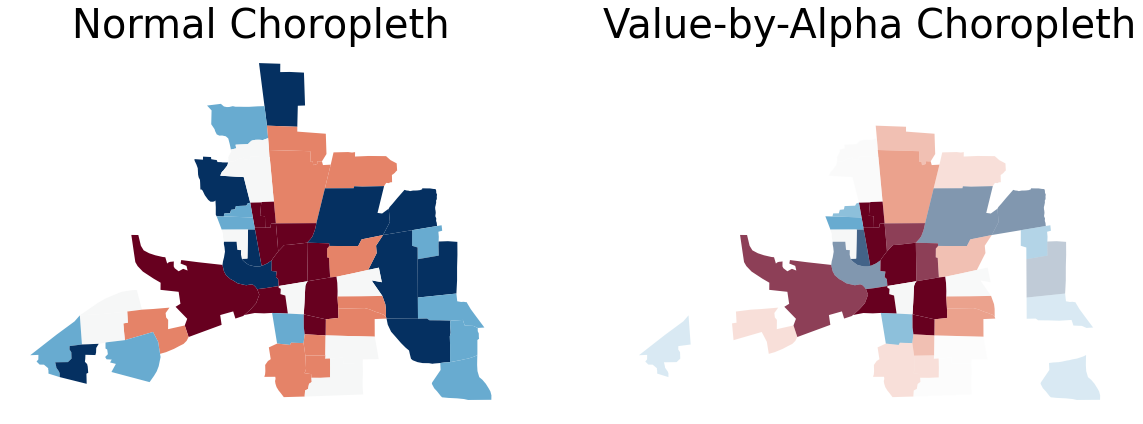

In [16]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# use gdf.plot() to create regular choropleth
gdf.plot(column='HOVAL', scheme='quantiles', cmap='RdBu', ax=axs[0])

# use vba_choropleth to create Value-by-Alpha Choropleth
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[1])

# set figure style
axs[0].set_title('Normal Choropleth', fontsize=40)
axs[0].set_axis_off()
axs[1].set_title('Value-by-Alpha Choropleth', fontsize =40)

# plot
plt.show()

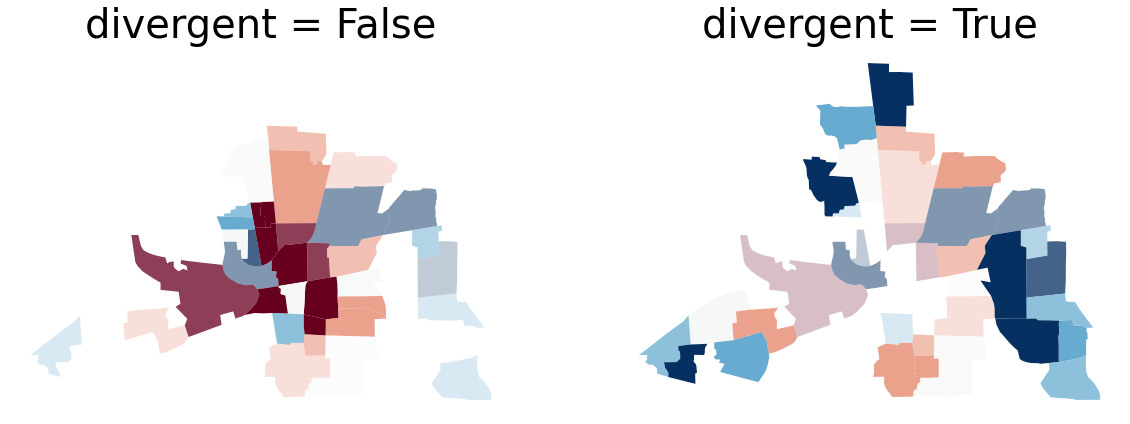

In [17]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# create a vba_choropleth
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[0],
               revert_alpha=False)

# set revert_alpha argument to True
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[1],
               revert_alpha = True)

# set figure style
axs[0].set_title('divergent = False', fontsize=40)
axs[1].set_title('divergent = True', fontsize=40)

# plot
plt.show()

You can see the original choropleth is fading into transparency wherever there is a high y value.

You can use the option to bin or classify your x and y values. splot uses mapclassify to bin your data and displays the new color and alpha ranges:

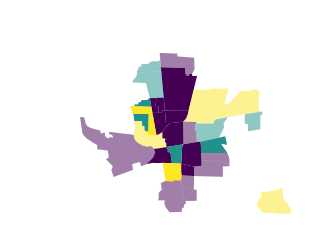

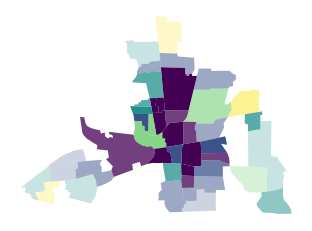

In [27]:


# classifier quantiles
vba_choropleth(x, y, gdf, cmap='viridis', 
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles', k=3))

# classifier natural_breaks
vba_choropleth(x, y, gdf, cmap='viridis', 
               rgb_mapclassify=dict(classifier='natural_breaks'), 
               alpha_mapclassify=dict(classifier='natural_breaks'))

plt.show()

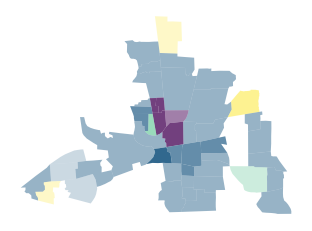

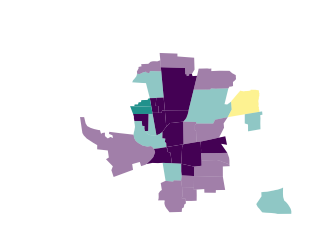

In [29]:
# classifier std_mean
vba_choropleth(x, y, gdf, cmap='viridis',
               rgb_mapclassify=dict(classifier='std_mean'), 
               alpha_mapclassify=dict(classifier='std_mean'))

# classifier fisher_jenks
vba_choropleth(x, y, gdf, cmap='viridis',
               rgb_mapclassify=dict(classifier='fisher_jenks', k=3), 
               alpha_mapclassify=dict(classifier='fisher_jenks', k=3))

plt.show()

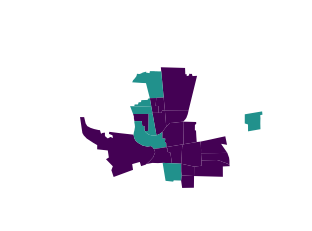

In [31]:
# classifier fisher_jenks
vba_choropleth(x, y, gdf, cmap='viridis',
               rgb_mapclassify=dict(classifier='fisher_jenks', k=3), 
               alpha_mapclassify=dict(classifier='fisher_jenks', k=2))

plt.show()

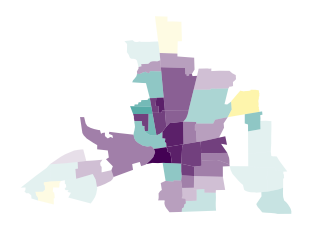

In [32]:
# classifier fisher_jenks
vba_choropleth(x, y, gdf, cmap='viridis',
               rgb_mapclassify=dict(classifier='fisher_jenks', k=3), 
               alpha_mapclassify=dict(classifier='fisher_jenks', k=9))

plt.show()

In [33]:
color_list = ['#a1dab4','#41b6c4','#225ea8']

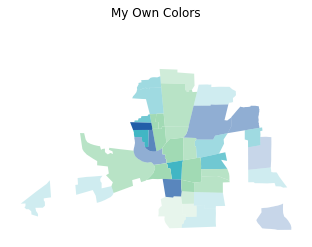

In [37]:

vba_choropleth(x, y, gdf, cmap=color_list,
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles'))

plt.title('My Own Colors')

plt.show()

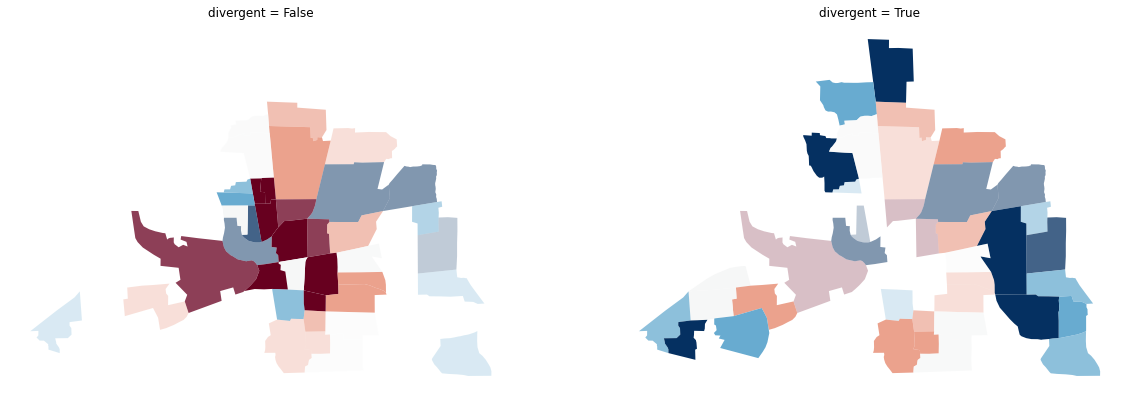

In [38]:
#Reverting Alphas

# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# create a vba_choropleth
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[0],
               revert_alpha=False)

# set revert_alpha argument to True
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[1],
               revert_alpha = True)

# set figure style
axs[0].set_title('divergent = False')
axs[1].set_title('divergent = True')

# plot
plt.show()

If you display divergent alpha values, the values at the extremes of your data range will be displayed with an alpha vale of 1. Values towards the middle of the data range will become more and more invisible towards the alpha value of 0.

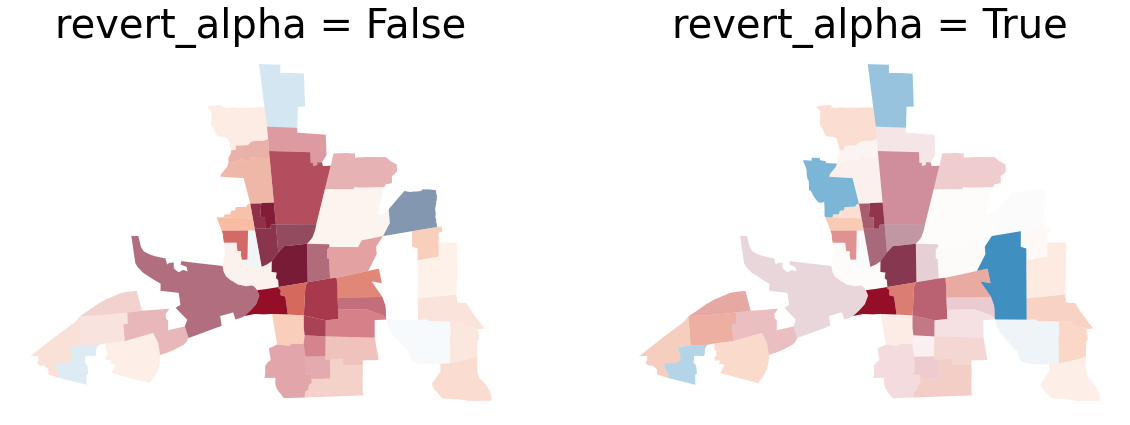

In [39]:
# create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# create a vba_choropleth
vba_choropleth(x, y, gdf, cmap='RdBu',
               divergent=False, ax=axs[0])

# set divergent to True
vba_choropleth(x, y, gdf, cmap='RdBu',
               divergent=True, ax=axs[1])

# set figure style
axs[0].set_title('revert_alpha = False',fontsize=40)
axs[0].set_axis_off()
axs[1].set_title('revert_alpha = True', fontsize=40)

# plot
plt.show()

In [40]:
from splot._viz_utils import shift_colormap

In [42]:

mid08 = shift_colormap('RdBu', midpoint=0.8)

# shift the midpoint to the 20st percentile of your datarange
mid02 = shift_colormap('RdBu', midpoint=0.2)

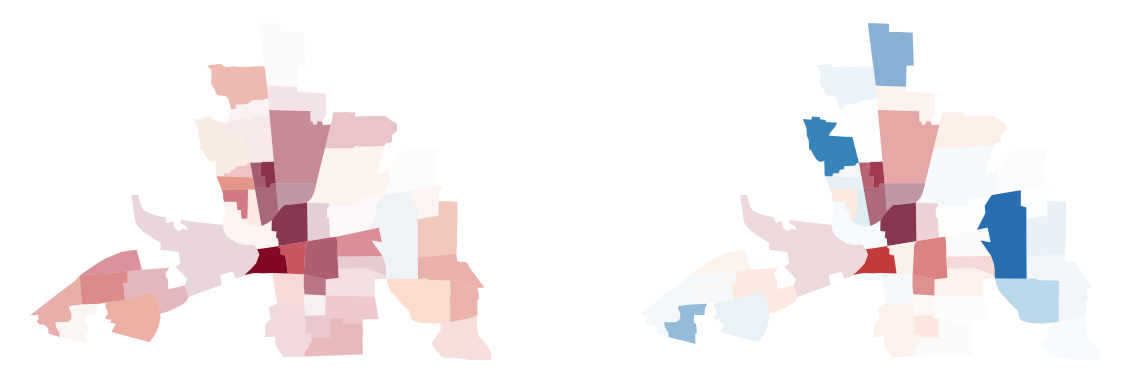

In [43]:
# create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# vba_choropleth with cmap mid08
vba_choropleth(x, y, gdf, cmap=mid08, ax=axs[0], divergent=True)

# vba_choropleth with cmap mid02
vba_choropleth(x, y, gdf, cmap=mid02, ax=axs[1], divergent=True)

# plot
plt.show()